In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("Concrete_Data.xls")
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = None)

## **Question 1:** 
**Part a: Gradient Descend without Normalization**

In [3]:
# mean square error function
m = len(x_train)
def mean_sq_err(y_pred, y_true):
  mse = sum((y_pred-y_true)**2)/m
  return mse


# function for gradient descent
def grad_desc(x_train, y_train, learning_rate,  iter):
  mse_old = None
  WEIGHTS = np.ones((iter, 8))
  BIAS = []
  MSE = np.ones((iter, 2))
  weights = np.array(np.random.randn(8))   ## random weight values initiated
  bias = np.random.randn()                 ## random bias values initiated
  for i in range(iter):
    y_pred_train = weights.dot(x_train.T) + bias   
    mse = mean_sq_err(y_pred_train, y_train)
    mse_old = mse

    weight_grad = -2*(sum((y_train-y_pred_train).dot(x_train)))/m    
    bias_grad = -2*(sum(y_train-y_pred_train))/m

    weights = weights - learning_rate*weight_grad
    bias = bias - learning_rate*bias_grad

    WEIGHTS[i,] = np.array([weights]).reshape(1, 8)
    BIAS = np.append(BIAS, bias)
    MSE[i, ] = np.array([i, mse]).reshape(1, 2)

  MSE = MSE[:i, ]
  WEIGHTS = WEIGHTS[:i, ]
  
  return WEIGHTS, BIAS, MSE, weights, mse, bias

# Prediction function
def predict(weights, bias, x):
  return np.dot(weights, x.T) + bias



**Training the model and calculating the weights with various learning rates**

In [4]:
#W, W_0, MSE, w_current, mse, bias_current = grad_desc(x_train, y_train, learning_rate = 0.0001, iter = 200)

alpha1 = 0.1
alpha2 = 0.01
alpha3 = 0.001
iterations_1 = 20000
iterations_2 = 20000
iterations_3 = 20000

W_alpha1, W_0_alpha1, MSE_alpha1, w_current_alpha1, mse_alpha1, bias_current_alpha1 = grad_desc(x_train, y_train, alpha1, iterations_1)

W_alpha2, W_0_alpha2, MSE_alpha2, w_current_alpha2, mse_alpha2, bias_current_alpha2 = grad_desc(x_train, y_train, alpha2, iterations_2)

W_alpha3, W_0_alpha3, MSE_alpha3, w_current_alpha3, mse_alpha3, bias_current_alpha3 = grad_desc(x_train, y_train, alpha3, iterations_2)



<ipython-input-3-798e0e665fef>:4: RuntimeWarning: overflow encountered in double_scalars
  mse = sum((y_pred-y_true)**2)/m
<ipython-input-3-798e0e665fef>:4: RuntimeWarning: overflow encountered in square
  mse = sum((y_pred-y_true)**2)/m
<ipython-input-3-798e0e665fef>:21: RuntimeWarning: overflow encountered in double_scalars
  weight_grad = -2*(sum((y_train-y_pred_train).dot(x_train)))/m


Text(0, 0.5, 'MSE')

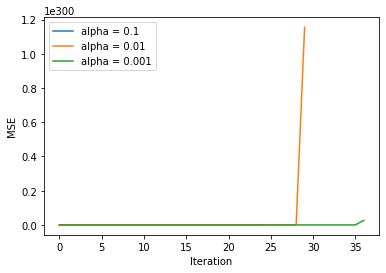

In [5]:
x1 = MSE_alpha1[:, 0]
y1 = MSE_alpha1[:, 1]

x2 = MSE_alpha2[:, 0]
y2 = MSE_alpha2[:, 1]

x3 = MSE_alpha3[:, 0]
y3 = MSE_alpha3[:, 1]

plt.figure
plt.plot(x1, y1, label = f'alpha = {alpha1}')
plt.plot(x2, y2, label = f'alpha = {alpha2}')
plt.plot(x3, y3, label = f'alpha = {alpha3}')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')

**Comparison of the results from various learning rates:**

---

*   Three learning rates (0.1, 0.01, 0.001) were chosen to apply gradient descent (NON-NORMALIZED).
*   The weights calcualted by the GD algorithm are reaching extremely high values within a small number of iterations itself, and NaN values are reached.
*   The higher weights lead to higher values of Y_predicted, leading to higher mean square error values.
*   Because the data is not normalized, for any of the learning rate value, the gradient descent algorithm is not able to minimize the Mean Square error (MSE) and the value of MSE goes very high as a result.

*   Given below are the predicted values of Y (output) from the last updated weights (alpha =0.001). The values are NaN, thus conforming that these values converged to infinity!

In [6]:
y_pred1 = predict(w_current_alpha3, bias_current_alpha3, x_test)
print(y_pred1)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

### **Part b: Batch Gradient Descent using Normalization** 

**Normalization**

In [7]:
dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)                 #)(dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
#normalized_dataset = dataset.apply(lambda rec: (rec-rec.mean())/rec.std(), axis = 0)
x_n =normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values
normalized_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,0.967445
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,0.741964
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,0.472642
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,0.482400
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,0.522806


In [8]:
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.3, random_state=0, stratify = None)

In [9]:
alpha1 = 0.01
alpha2 = 0.001
alpha3 = 0.0001
iterations_1 = 10000
iterations_2 = 10000
iterations_3 = 10000

In [10]:
W_alpha1, W_0_alpha1, MSE_alpha1, w_current_alpha1, mse_alpha1, bias_current_alpha1 = grad_desc(x_train_n, y_train_n, alpha1, iterations_1)

W_alpha2, W_0_alpha2, MSE_alpha2, w_current_alpha2, mse_alpha2, bias_current_alpha2 = grad_desc(x_train_n, y_train_n, alpha2, iterations_2)

W_alpha3, W_0_alpha3, MSE_alpha3, w_current_alpha3, mse_alpha3, bias_current_alpha3 = grad_desc(x_train_n, y_train_n, alpha3, iterations_2)


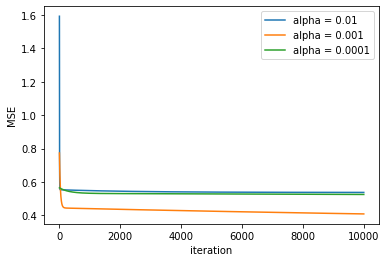

In [11]:
plt.figure
x1 = MSE_alpha1[:, 0]
y1 = MSE_alpha1[:, 1]

x2 = MSE_alpha2[:, 0]
y2 = MSE_alpha2[:, 1]

x3 = MSE_alpha3[:, 0]
y3 = MSE_alpha3[:, 1]

plt.figure
plt.plot(x1, y1, label = f'alpha = {alpha1}')
plt.plot(x2, y2, label = f'alpha = {alpha2}')
plt.plot(x3, y3, label = f'alpha = {alpha3}')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend()


In [12]:
# Final weights calculated for the three learning rates are:
print(w_current_alpha1)
print(w_current_alpha2)
print(w_current_alpha3)

[-0.63609629 -1.01840338  0.25098485  0.51624709  1.15076365  1.89642098
 -0.80991027 -1.59824853]
[ 1.2667035  -0.06338684 -1.32337469  0.98648628  0.6840679  -0.04521643
 -0.54373638  0.54315263]
[-1.13045023  1.36871175 -0.39589821  1.12670946 -0.51090879  0.31702534
 -0.24036662 -0.97433042]


**Comparison of the results from various learning rates:**

---

*   Three learning rates (0.01, 0.001, 0.0001) were chosen to apply gradient descent (NON-NORMALIZED).
*   alpha = 0.01 gave the highest MSE value after convergence. 
*   By reducing the alpha value to 0.001, MSE decreased, but decreasing the alpha value further increased the MSE. 
*  Therefore, Learning rate (alpha) = 0.001 is the optimal value in this case.
---
The effect of normalization is clearly visible here. Just by normalizing the data, the same model is able to minimize the MSE and find the optimal weights for the data.

##Part c: Gradient descent with the help of pytorch


**C-1: without Normalization**

In [13]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

torch.Size([8, 1])
torch.Size([1])
tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], requires_grad=True)
tensor([nan], requires_grad=True)


Text(0, 0.5, 'MSE')

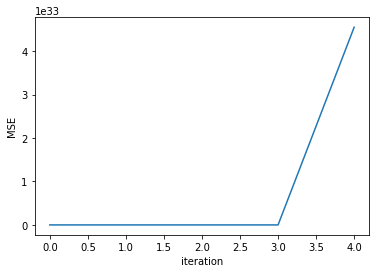

In [14]:
x_train_tns = torch.from_numpy(x_train).to(torch.float32)
y_train_tns = torch.from_numpy(y_train).to(torch.float32)

x_train_tns = x_train_tns.float()
y_train_tns = y_train_tns.float()

w = torch.randn(8,1, requires_grad=True).to(torch.float32)
b = torch.randn(1, requires_grad=True).to(torch.float32)
w = w.float()
b = b.float()

print(w.shape)
print(b.shape)
# defining the function for forward pass for prediction
def forward(input):
    return w.T@ input.T + b #w.dot(input)  + b 
  
# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)



step_size= 0.001
n_iter = 10000
loss_BGD = []
for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(x_train_tns)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, y_train_tns)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
   # print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))
print(w)
print(b)

plt.figure
plt.plot(loss_BGD)
plt.xlabel('iteration')
plt.ylabel('MSE')

**C-1: with Normalization**

torch.Size([8, 1])
torch.Size([1])
tensor([[ 0.3599],
        [ 0.1261],
        [ 0.0184],
        [-0.4735],
        [ 0.0909],
        [-0.1812],
        [-0.2673],
        [ 0.2961]], requires_grad=True)
tensor([0.6219], requires_grad=True)


Text(0, 0.5, 'MSE')

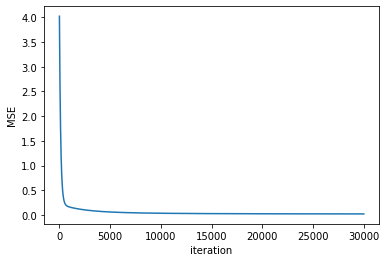

In [15]:
x_train_n_tns = torch.from_numpy(x_train_n).to(torch.float32)
y_train_n_tns = torch.from_numpy(y_train_n).to(torch.float32)

x_train_tns = x_train_n_tns.float()
y_train_tns = y_train_n_tns.float()

w = torch.randn(8,1, requires_grad=True).to(torch.float32)
b = torch.randn(1, requires_grad=True).to(torch.float32)
w = w.float()
b = b.float()

print(w.shape)
print(b.shape)
# defining the function for forward pass for prediction
def forward(input):
    return w.T@ input.T + b #w.dot(input)  + b 
  
# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)



step_size= 0.001
n_iter = 30000
loss_BGD = []
for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(x_train_tns)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, y_train_tns)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
   # print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))
print(w)
print(b)

plt.figure
plt.plot(loss_BGD)
plt.xlabel('iteration')
plt.ylabel('MSE')

Pytorch was used to do batch gradient descent with and without normalization.
---
Wihtout Normalization
*   For the data without normalization the same situation as in question 1 occurred. The mean square error exploded to infinite values as the iterations went high. For different learning rates as well, optimal weights could not be found.
---  
With Normalization

* The algorithm is able to find the optimum weights and minimize the mean square error for different learning rates (0.1, 0.001, 0.0001).
* 0.001 was found to be the optimal learning rate.   



##**Question 2**

**Part 1. Stochastic Gradient Descent: From Scratch**

In [16]:
# function for Stochastic Gradient Descent
def sgd_scratch(x, y, learning_rate, iter):
  m= 721
  n = 8
  theta = np.random.randn(n).reshape((1,n))
  bias = np.random.randn()
  ITER =np.zeros(iter)
  MSE = np.zeros(iter)
  for i in range(iter):
    mse = 0.0 
    for k in range(n):     
      j= np.random.randint(0,n)
      x_j = x[j,:].reshape((1, n))
      y_pred = sum(x_j.dot(theta.T)) + bias
      error = (y_pred-y[j])**2
      theta_gradient = -2*(y[j]-y_pred)*x[j].T
      bias_gradient = -2*(y[j]-y_pred)
      theta = theta -learning_rate * theta_gradient
      bias = bias - learning_rate * bias_gradient
      mse += error
    MSE[i] = mse
    ITER[i] =i
  return theta, bias, MSE, ITER

Text(0, 0.5, 'MSE')

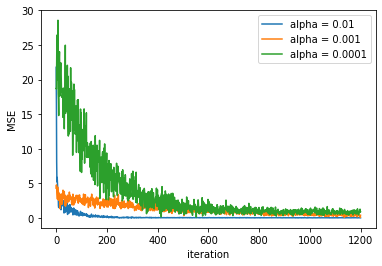

In [17]:
alpha1 = 0.01
alpha2 = 0.001
alpha3 = 0.0001
iterations_1 = 1200
iterations_2 = 1200
iterations_3 = 1200

w_current_alpha1, bias_current_alpha1, MSE_alpha1, ITER_alpha1  = sgd_scratch(x_train_n, y_train_n, alpha1, iterations_1)

w_current_alpha2, bias_current_alpha2, MSE_alpha2, ITER_alpha2 = sgd_scratch(x_train_n, y_train_n, alpha2, iterations_2)

w_current_alpha3, bias_current_alpha3, MSE_alpha3, ITER_alpha3 = sgd_scratch(x_train_n, y_train_n, alpha3, iterations_3)


x1 = ITER_alpha1
y1 = MSE_alpha1
x2 = ITER_alpha2
y2 = MSE_alpha2

x3 = ITER_alpha3
y3 = MSE_alpha3

plt.figure
plt.plot(y1, label = f'alpha = {alpha1}')
plt.plot(y2, label = f'alpha = {alpha2}')
plt.plot(y3, label = f'alpha = {alpha3}')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('MSE')


* The algorithm is able to find the optimum weights and minimize the mean square error for different learning rates (0.1, 0.001, 0.0001).
* 0.01 was found to be the optimal learning rate as the mean square error is lowest in this case. But the learning rate 0.001 also gives similar result.

**Part 2. Stochastic gradient descend using Pytorch**

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([721])) that is different to the input size (torch.Size([721, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0, 0.5, 'MSE')

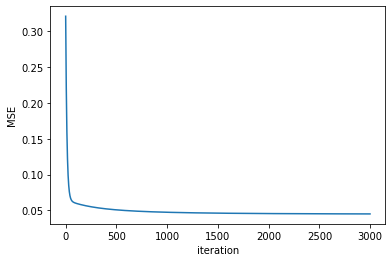

In [18]:
import torch

x_train_n_p = torch.from_numpy(x_train_n).to(torch.float32)
y_train_n_p = torch.from_numpy(y_train_n).to(torch.float32)
# Defining the model
model = torch.nn.Linear(8, 1, bias=True)

# Defining the loss function: Mean Square Error
criterion = torch.nn.MSELoss()

learning_rate = 0.01
# Optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 3000


# Train the model
loss_history = []
epochs =[]
for epoch in range(num_epochs):
  
  predictions = model(x_train_n_p)

  loss = criterion(predictions, y_train_n_p)
    
    # Zero the gradients
  optimizer.zero_grad()
    
    # Compute the gradients
  loss.backward()
    
    # Update the model parameters
  optimizer.step()
  loss_history.append(loss.item())

plt.figure;
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('MSE')

* The algorithm is able to find the optimum weights and minimize the mean square error for different learning rates.
* 0.01 was found to be the optimal learning rate as the mean square error is lowest in this case.

** Part3: Minibatch gradient descend from scratch with normalized data**

In [19]:
def minibatch_scratch(x, y, learning_rate, iter):
  m= x_train_n.shape[0]
  n = x_train_n.shape[1]
  batch_size = 10
  theta = np.zeros(n).reshape((1,n))
  bias = np.random.randn()
  ITER =np.zeros(iter)
  MSE = np.zeros(iter)
  for i in range(iter):
    mse = 0.0 
    for k in range(n):     
      j= np.random.randint(0,n)  
      X = x[j:j+batch_size,:]
  #    print(X.shape)
      Y = y[j:j+ batch_size].reshape((batch_size, 1))
    #  print(Y.shape)
      y_pred = np.dot(X, theta.T) + bias*np.ones((batch_size, 1))
  #    print(y_pred.shape)
      error = sum((y_pred-Y)**2)/batch_size
  #    print(error.shape)
      theta_gradient = -2*(Y-y_pred).T.dot(X)
      bias_gradient = -2*(Y-y_pred)
      theta = theta -learning_rate * theta_gradient
      bias = bias - learning_rate * bias_gradient
      mse += error
    MSE[i] = mse
    ITER[i] =i
  return theta, bias, MSE, ITER

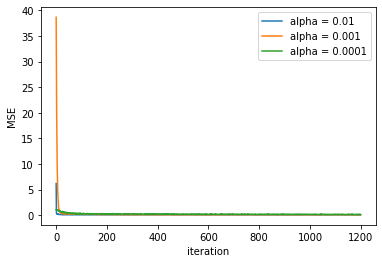

In [20]:
alpha1 = 0.01
alpha2 = 0.001
alpha3 = 0.0001
iterations_1 = 1200
iterations_2 = 1200
iterations_3 = 1200

w_current_alpha1, bias_current_alpha1, MSE_alpha1, ITER_alpha1  = minibatch_scratch(x_train_n, y_train_n, alpha1, iterations_1)

w_current_alpha2, bias_current_alpha2, MSE_alpha2, ITER_alpha2 = minibatch_scratch(x_train_n, y_train_n, alpha2, iterations_2)

w_current_alpha3, bias_current_alpha3, MSE_alpha3, ITER_alpha3 = minibatch_scratch(x_train_n, y_train_n, alpha3, iterations_3)


x1 = ITER_alpha1
y1 = MSE_alpha1
x2 = ITER_alpha2
y2 = MSE_alpha2

x3 = ITER_alpha3
y3 = MSE_alpha3

plt.figure
plt.plot(y1, label = f'alpha = {alpha1}')
plt.plot(y2, label = f'alpha = {alpha2}')
plt.plot(y3, label = f'alpha = {alpha3}')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend()

* The algorithm is able to find the optimum weights and minimize the mean square error for different learning rates (0.1, 0.001, 0.0001).
* 0.01 was found to be the optimal learning rate as the mean square error is lowest in this case. But the learning rate 0.001 also gives similar result.

**Part 4. Minibatch using pytorch**

In [21]:
import torch
from torch.utils.data import DataLoader, TensorDataset

batch_size = 10

x_train_n_p = torch.from_numpy(x_train_n).to(torch.float32)
y_train_n_p = torch.from_numpy(y_train_n).to(torch.float32)

dataset = TensorDataset(x_train_n_p, y_train_n_p)

train_loader = DataLoader(dataset, batch_size, shuffle=True)


# Defining the model
model = torch.nn.Linear(8, 1, bias=True)

# Defining the loss function: Mean Square Error
criterion = torch.nn.MSELoss()

learning_rate = 0.01
# Optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 1000

# Train the model
loss_history = []


for epoch in range(num_epochs):
  for X, Y in train_loader:
    Y_predicted = model(X)
    loss = criterion(Y_predicted, Y)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Compute the gradients
    loss.backward()
    
    # Update the model parameters
  optimizer.step()
  loss_history.append(loss.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0, 0.5, 'MSE')

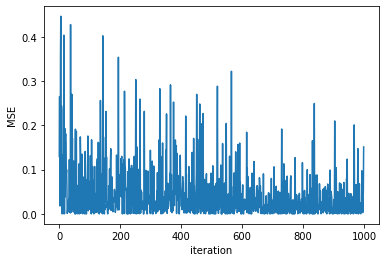

In [22]:
plt.figure;
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('MSE')

* The algorithm is able to find the optimum weights and minimize the mean square error for different learning rates.
* 0.01 was found to be the optimal learning rate as the mean square error is lowest in this case.

##**Question 3: Gradient Descent with Momentum**


**1.MOmentum method From Scratch**

In [23]:
def compute_gradients(x,y,y_hat,b_0, theta_o,lr, gama,vt):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    #vt = np.zeros(1)
    vt = gama * vt + lr * db
    b_1 = b_0 - vt

    vt = np.zeros(theta_o.shape[0])
    vt = gama * vt + lr * dw
    theta_1 = theta_o - vt
    return b_1,theta_1

  
def initialize(nums):
  b = np.random.random()
  w = np.random.randn(nums)
  return b,w

def predict_Y(b,theta,X):
  return b + np.dot(X,theta)

#calculationg cost function:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)


In [24]:

def grad_descent_momentum(X,Y,alpha, num_iterations, gama):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    vt = np.zeros(1)
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)   #predict
      this_cost=get_cost(Y,Y_hat)   #mse _loss  
      prev_b=b
      prev_theta=theta
      #b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)   #update w and b
      b, theta = compute_gradients(X,Y,Y_hat,prev_b,prev_theta,alpha, gama,vt)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]    #adding each cost with iteration in a dataframe
        result_idx=result_idx+1
      iter_num +=1
    return gd_iterations_df,b,theta,this_cost
gd_iterations_df,b,theta, mse_loss= grad_descent_momentum(x_train_n,y_train_n,alpha=0.001,num_iterations=1000,gama = 0.9)
print('Final Estimate of b and theta : ',b,theta)

Final Estimate of b and theta :  [0.23114538] [ 1.18024628  0.31492872  0.46322339 -1.63956203 -1.36742792 -0.28477468
  1.30571931  0.85169359]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

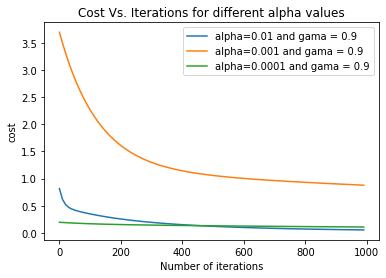

In [25]:
alpha_dfm_1,b,theta, mse_loss1=grad_descent_momentum(x_train_n,y_train_n,alpha=0.01,num_iterations=1000, gama = 0.9)
alpha_dfm_2,b,theta, mse_loss2=grad_descent_momentum(x_train_n,y_train_n,alpha=0.001,num_iterations=1000, gama= 0.9)
alpha_dfm_3,b,theta, mse_loss1=grad_descent_momentum(x_train_n,y_train_n,alpha=0.001,num_iterations=1000, gama = 0.9)
plt.plot(alpha_dfm_1['iteration'],alpha_dfm_1['cost'],label='alpha=0.01 and gama = 0.9')
plt.plot(alpha_dfm_2['iteration'],alpha_dfm_2['cost'],label='alpha=0.001 and gama = 0.9')
plt.plot(alpha_dfm_3['iteration'],alpha_dfm_3['cost'],label='alpha=0.0001 and gama = 0.9')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

**2. Momentum method using Pytorch**

In [26]:
from torch.utils.data import DataLoader
#batch_size 
bs =30

train_loader = DataLoader(dataset, batch_size=bs, shuffle=True)
w_t = torch.randn(bs, 8, requires_grad=True)
b_t = torch.randn(bs, requires_grad=True)
print(w_t)
print(b_t)

import torch.nn as nn
# Define model
model = nn.Linear(bs, 8)
print(model.weight)
print(model.bias)



def model(X):
    return X.float() @ w_t.t() + b_t

tensor([[-2.2098, -0.5438, -2.0270,  0.6509,  0.6026, -0.1101,  0.5524,  1.0244],
        [-0.2732,  0.5375,  1.1700, -0.9795,  0.9917, -1.7726, -1.3071,  1.4975],
        [-1.3475, -0.1720,  0.8366, -0.9572, -1.0975, -0.8227, -0.8450, -0.8484],
        [-1.3893, -0.6663,  2.5039, -0.9392,  0.2464,  0.4324, -0.1441, -0.4203],
        [-1.4309, -2.1778, -0.8047,  0.2621, -0.2079,  0.4444, -0.9434,  0.5428],
        [-0.7417,  0.0163, -1.0804,  0.5470,  0.1495, -0.7683,  1.0713, -0.6614],
        [ 0.1251, -0.4838, -1.1098, -0.8062,  0.4334,  0.4387,  0.4372, -1.5457],
        [-0.0905, -0.4041,  0.6854, -1.2276,  0.4673, -2.3133, -0.5993, -1.0340],
        [-0.5255, -1.5817, -2.3641,  1.5996, -0.1645,  1.0990, -0.1690, -0.3407],
        [-1.1578,  0.1503,  0.1279, -0.3795,  0.9553,  0.1649,  0.0708,  1.5832],
        [ 0.5779,  0.3434,  1.0197,  0.7624, -0.5651, -1.3486,  0.1908,  0.5397],
        [ 0.7844,  0.0963,  0.1575, -0.6195, -0.8333, -1.7531,  1.3905,  1.7934],
        [-0.8598

In [27]:
# Import nn.functional
import torch.nn.functional as F

In [28]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    loss_val= []
    running_loss = 0.0
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_loader:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            #loss = loss_fn(pred, yb)
            loss = mse_loss(pred, yb.view(1,-1))
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients

            #opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
            #optimizer.zero_grad()
            #loss_fn(model(input), target).backward()
            #optimizer.step()
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()

            running_loss = loss.item() 

        loss_val.append(running_loss)


        
        # Print the progress
        #if (epoch+1) % 100 == 0:
            #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    plt.figure;
    plt.plot(loss_val)
    plt.xlabel('iteration')
    plt.ylabel('MSE')
    #return loss_val

In [29]:
# Define model
model = nn.Linear(bs, 8)
print(model.weight)
print(model.bias)
opt = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.1)

Parameter containing:
tensor([[ 0.0457,  0.1685, -0.1699, -0.0828,  0.0102, -0.1755, -0.1491, -0.0877,
          0.0751, -0.0654, -0.1382, -0.1147,  0.0907, -0.1580, -0.0935,  0.1287,
          0.1022,  0.1554, -0.1664,  0.0793,  0.0765,  0.0182, -0.1288,  0.0761,
          0.0778,  0.1797,  0.1139, -0.1498, -0.0248,  0.1342],
        [ 0.1412,  0.0111, -0.0842,  0.0138,  0.0644, -0.1453, -0.1006, -0.1675,
         -0.1347, -0.1230,  0.1459,  0.1140,  0.0161,  0.0120, -0.1347, -0.1564,
         -0.1824, -0.1621,  0.0233, -0.0853,  0.1389,  0.0095, -0.1716,  0.1158,
         -0.1269, -0.0271, -0.0741, -0.0250, -0.0247, -0.1813],
        [ 0.1779, -0.1459, -0.1559, -0.0110, -0.1029,  0.1279, -0.1633, -0.1650,
          0.0388,  0.0921,  0.1645, -0.0859,  0.0131, -0.0132,  0.0054, -0.0958,
          0.0589,  0.0602, -0.1723,  0.1419,  0.0999, -0.0902,  0.1253, -0.1787,
         -0.0646, -0.1726,  0.0109, -0.1216, -0.1624,  0.0265],
        [ 0.0541, -0.1752, -0.1278, -0.0119, -0.1480,  0.

In [30]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

In [31]:
def model(X):
    return X.float() @ w_t.t() + b_t

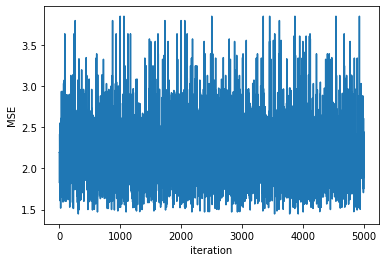

In [32]:
fit(5000, model, loss, opt)

**Comparison between From scratch method and Pytorch Method**

Pytorch Method introduced more vairation in the MSE. But the predictions are coming closer to the actual values. However both approaches try to gain the minimal error.

## **Question 4**

1.Nesterov: Pytorch method

In [33]:
# Define model
bs = 30
model = nn.Linear(bs, 8)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0664,  0.1561, -0.1661,  0.0557, -0.0856, -0.1116,  0.1182,  0.1494,
         -0.0566,  0.0704, -0.0619,  0.1219, -0.1244, -0.1662, -0.0629,  0.0232,
          0.0535,  0.1816,  0.1607, -0.1714, -0.0178, -0.1084,  0.0746, -0.1784,
         -0.0356,  0.1472, -0.0744, -0.1431,  0.1550, -0.0289],
        [-0.0460,  0.0145,  0.1541, -0.0107, -0.0783, -0.1044,  0.1466, -0.0245,
          0.1647,  0.1229, -0.1307,  0.0287, -0.0489,  0.0128,  0.0484, -0.1493,
          0.1274, -0.0857, -0.1512, -0.1181, -0.0924, -0.0827,  0.1796,  0.1647,
         -0.1765, -0.0333, -0.1714,  0.0302, -0.0828, -0.0573],
        [ 0.1376,  0.0366,  0.0288, -0.1746,  0.0034,  0.1425, -0.1272,  0.0075,
          0.0622,  0.0196,  0.1509,  0.0368,  0.1671, -0.1000, -0.1077,  0.0907,
          0.1796, -0.0934, -0.0618,  0.0658, -0.0148, -0.0257, -0.0169, -0.1690,
         -0.1472,  0.0337, -0.1373, -0.1258,  0.0581, -0.0754],
        [-0.1743, -0.1540,  0.0704, -0.0284,  0.1041, -0.

In [34]:
opt_na = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)

In [35]:
def model(X):
    return X.float() @ w_t.t() + b_t

In [36]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

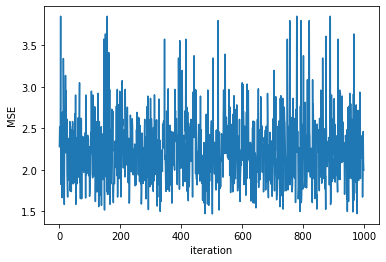

In [37]:
loss_values_nes=fit(1000, model, loss, opt_na)

nestrov from scratch

In [45]:
def compute_gradients_nestrov(x,y,y_hat,b_0, theta_o,lr, gama,vt,vtt):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    
    vt = gama * vt + lr * db   #vt =  update
    b_1 = b_0 - vt

    theta_lah = theta_o - gama*vtt
    #vt = np.zeros(theta_o.shape[0])
    vtt = gama * vtt + lr * dw
    theta_1 = theta_o - vtt
    return b_1,theta_1

In [46]:
b,theta=initialize(x_train.shape[1])

In [47]:
Y_hat=predict_Y(b,theta,x_train)

In [48]:
def run_gradient_descent_nestrov(X,Y,alpha, num_iterations, gama):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    vt = np.zeros(1)
    vtt = np.zeros(8)
    for each_iter in range(num_iterations):
      Y_hat=predict_Y(b,theta,X)   #predict
      this_cost=get_cost(Y,Y_hat)   #mse _loss  
      prev_b=b
      prev_theta=theta
      #b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)   #update w and b
      b, theta = compute_gradients_nestrov(X,Y,Y_hat,prev_b,prev_theta,alpha, gama,vt,vtt)
      if(iter_num%10==0):
        gd_iterations_df.loc[result_idx]=[iter_num,this_cost]    #adding each cost with iteration in a dataframe
        result_idx=result_idx+1
      iter_num +=1
     # print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta,this_cost


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

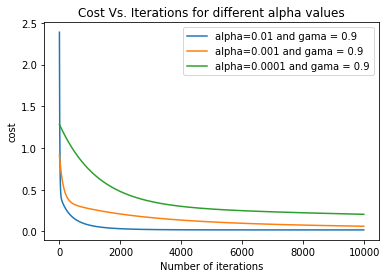

In [49]:
alpha_dfm_1,b,theta, mse_loss1=run_gradient_descent_nestrov(x_train_n,y_train_n,alpha=0.01,num_iterations=10000, gama = 0.9)
alpha_dfm_2,b,theta, mse_loss2=run_gradient_descent_nestrov(x_train_n,y_train_n,alpha=0.001,num_iterations=10000, gama= 0.9)
alpha_dfm_3,b,theta, mse_loss1=run_gradient_descent_nestrov(x_train_n,y_train_n,alpha=0.0001,num_iterations=10000, gama = 0.9)

plt.plot(alpha_dfm_1['iteration'],alpha_dfm_1['cost'],label='alpha=0.01 and gama = 0.9')
plt.plot(alpha_dfm_2['iteration'],alpha_dfm_2['cost'],label='alpha=0.001 and gama = 0.9')
plt.plot(alpha_dfm_3['iteration'],alpha_dfm_3['cost'],label='alpha=0.0001 and gama = 0.9')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

**Comparison between From scratch method and Pytorch Method**

Pytorch Method introduced more vairation in the MSE. But the predictions are coming closer to the actual values. However both approaches try to gain the minimal error.